# Topic Modeling using LDA

## 1. Loading Data

In [1]:
from pathlib import Path
import os
import sys
sys.path.insert(10, str(Path(os.getcwd()).resolve().parents[0]) + '/')

In [2]:
# Importing libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.data_selection import DocumentSelection
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/blacfli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Read csv file for the paper 
FOLDER_PATH = sys.path[-1] + 'dataset/reuters.csv'
FOLDER_PATH_2 = sys.path[-1] + 'dataset/wiki.csv'

reference_reuters = pd.read_csv(FOLDER_PATH)['texts'].values

reference_wiki = pd.read_csv(FOLDER_PATH_2)['texts'].values

In [4]:
DocumentSelector_reuters = DocumentSelection(reference_reuters)
DocumentSelector_reuters.document_selector_hyper()

DocumentSelector_wiki = DocumentSelection(reference_wiki)
DocumentSelector_wiki.document_selector_hyper()

took: 75.38393568992615
took: 3.7952330112457275


In [5]:
med_reuters = np.quantile(DocumentSelector_reuters.hyper_std, 0.05)
DocumentSelector_reuters.select_hyper_document(med_reuters)
print('hyper:', len(DocumentSelector_reuters.selected_doc_hyper))

med_wiki = np.quantile(DocumentSelector_wiki.hyper_std, 0.05)
DocumentSelector_wiki.select_hyper_document(med_wiki)
print('hyper:', len(DocumentSelector_wiki.selected_doc_hyper))

hyper: 952
hyper: 61


In [6]:
d_hyper_reuters = {'texts': DocumentSelector_reuters.selected_doc_hyper}
selected_doc_hyper = pd.DataFrame(data=d_hyper_reuters)

d_hyper_wiki = {'texts': DocumentSelector_wiki.selected_doc_hyper}
selected_doc_hyper = pd.DataFrame(data=d_hyper_wiki)

In [7]:
sorted_hyper_reuters = np.sort(DocumentSelector_reuters.hyper_std)
sorted_hyper_reuters = sorted_hyper_reuters[sorted_hyper_reuters>=0.]
lower_reuters = sorted_hyper_reuters[sorted_hyper_reuters<med_reuters]
upper_reuters = sorted_hyper_reuters[sorted_hyper_reuters>=med_reuters]

med_reuters_2 = np.quantile(DocumentSelector_reuters.hyper_std, 0.5)
med_reuters_3 = np.quantile(DocumentSelector_reuters.hyper_std, 0.93)

sorted_hyper_wiki = np.sort(DocumentSelector_wiki.hyper_std)
sorted_hyper_wiki = sorted_hyper_wiki[sorted_hyper_wiki>=0.]
lower_wiki = sorted_hyper_wiki[sorted_hyper_wiki<med_wiki]
upper_wiki = sorted_hyper_wiki[sorted_hyper_wiki>=med_wiki]

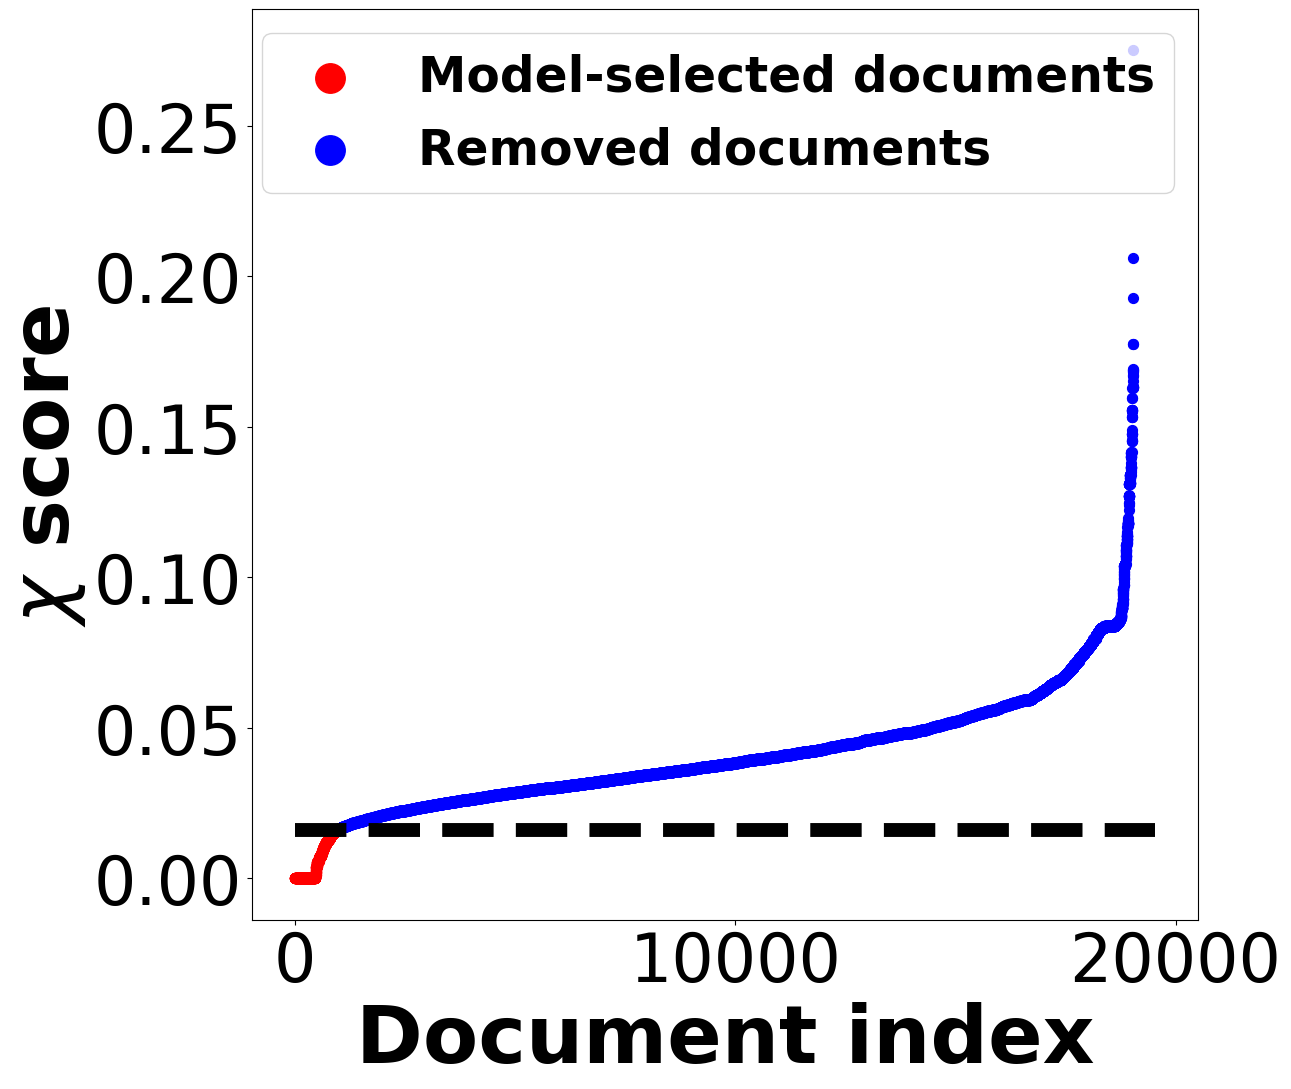

In [ ]:
plt.figure(figsize = [13, 11])
plt.scatter(np.array([*range(len(lower_reuters))]), lower_reuters, s = 50, c='red', label = 'Model-selected documents')
plt.scatter(np.array([*range(len(lower_reuters), len(sorted_hyper_reuters))]), upper_reuters, s = 50, c='blue', label = 'Removed documents')
plt.hlines(med_reuters, -0.1, (len(sorted_hyper_reuters) + 500), linestyles = 'dashed', colors= 'black', linewidth = 10)
plt.xlabel("Document index", fontsize = 58, fontweight = 'bold')
plt.ylabel(r"$\chi$ score", fontsize = 58, fontweight = 'bold')
plt.legend(prop={'size': 35,
                 'weight': 'bold'},
           markerscale=3)
plt.xticks(size = 48)
plt.yticks(size = 48)
plt.locator_params(axis='x', nbins=4)
plt.tight_layout()
# plt.savefig(sys.path[-1] + "images_result/select_reuter.pdf")

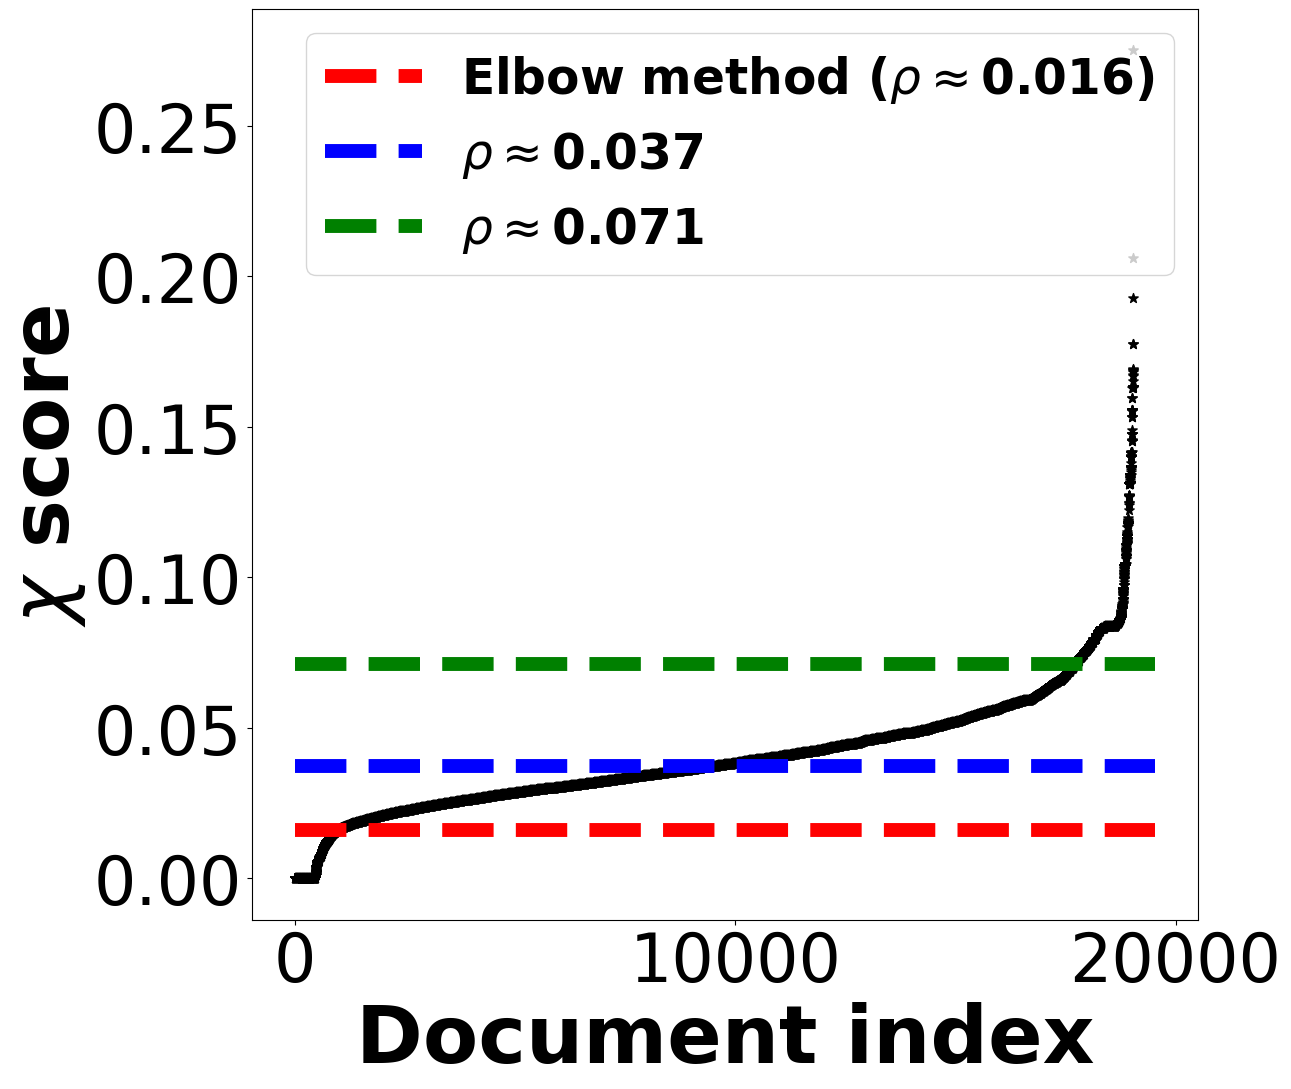

In [ ]:
plt.figure(figsize = [13, 11])
plt.scatter(np.array([*range(len(sorted_hyper_reuters))]), sorted_hyper_reuters, marker="*", s = 50, c='black')
plt.hlines(med_reuters, -0.1, (len(sorted_hyper_reuters) + 500), linestyles = 'dashed', colors= 'red', linewidth = 10, label=r"Elbow method ($\rho\approx$0.016)")
plt.hlines(med_reuters_2, -0.1, (len(sorted_hyper_reuters) + 500), linestyles = 'dashed', colors= 'blue', linewidth = 10, label=r"$\rho\approx$0.037")
plt.hlines(med_reuters_3, -0.1, (len(sorted_hyper_reuters) + 500), linestyles = 'dashed', colors= 'green', linewidth = 10, label=r"$\rho\approx$0.071")
plt.xlabel("Document index", fontsize = 58, fontweight = 'bold')
plt.ylabel(r"$\chi$ score", fontsize = 58, fontweight = 'bold')
plt.legend(prop={'size': 35,
                 'weight': 'bold'},
           markerscale=3)
plt.xticks(size = 48)
plt.yticks(size = 48)
plt.locator_params(axis='x', nbins=3)
plt.tight_layout()
# plt.savefig(sys.path[-1] + "images_result/select_threshold.pdf")

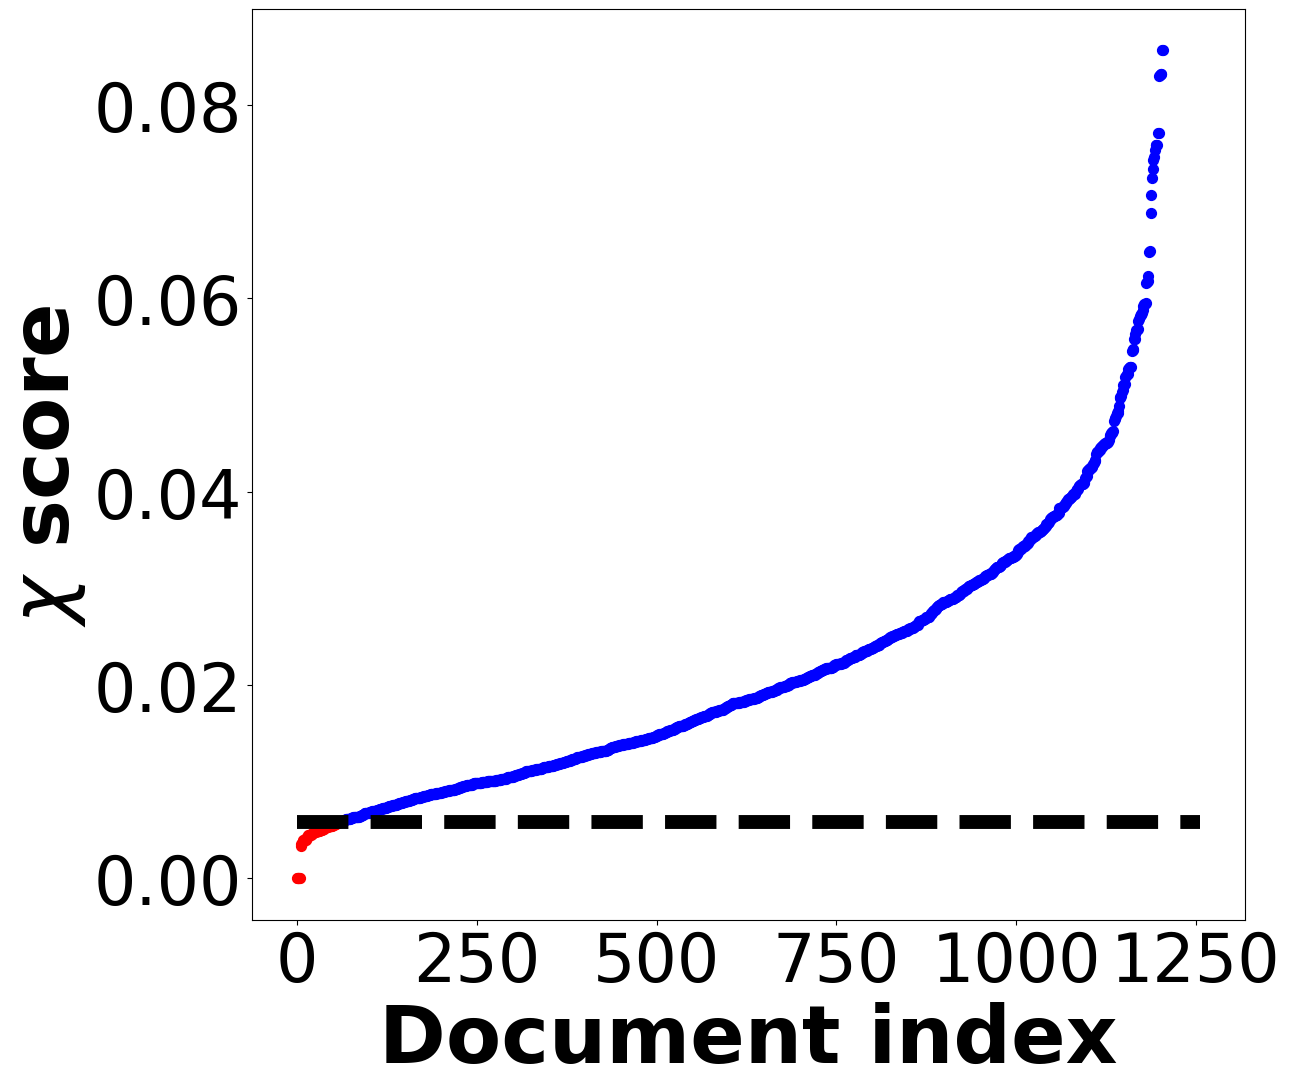

In [ ]:
plt.figure(figsize = [13, 11])
plt.scatter(np.array([*range(len(lower_wiki))]), lower_wiki, s = 50, c='red', label = 'Model-selected documents')
plt.scatter(np.array([*range(len(lower_wiki), len(sorted_hyper_wiki))]), upper_wiki, s = 50, c='blue', label = 'Removed documents')
plt.hlines(med_wiki, -0.1, (len(sorted_hyper_wiki) + 50), linestyles = 'dashed', colors= 'black', linewidth = 10)
plt.xlabel("Document index", fontsize = 58, fontweight = 'bold')
plt.ylabel(r"$\chi$ score", fontsize = 58, fontweight = 'bold')
plt.xticks(size = 48)
plt.yticks(size = 48)
plt.locator_params(axis='x', nbins=6)
plt.tight_layout()
# plt.savefig(sys.path[-1] + "images_result/select_wiki.pdf")

In [11]:
with open(sys.path[-1] + 'model_results/reuters_ref_results.pkl', 'rb') as handle:
    model_results_ori = pickle.load(handle)

with open(sys.path[-1] + 'model_results/reuters_zipf_results.pkl', 'rb') as handle:
    model_results_zipf = pickle.load(handle)

with open(sys.path[-1] + 'model_results/reuters_hyper_results.pkl', 'rb') as handle:
    model_results_hyper = pickle.load(handle)

with open(sys.path[-1] + 'model_results/reuters_hyper_results_threshold2.pkl', 'rb') as handle:
    model_results_hyper_9522 = pickle.load(handle)

with open(sys.path[-1] + 'model_results/reuters_hyper_results_threshold3.pkl', 'rb') as handle:
    model_results_hyper_17730 = pickle.load(handle)
    
with open(sys.path[-1] + 'model_results/wiki_ref_results.pkl', 'rb') as handle:
    wiki_model_results_ori = pickle.load(handle)

with open(sys.path[-1] + 'model_results/wiki_zipf_results.pkl', 'rb') as handle:
    wiki_model_results_zipf = pickle.load(handle)

with open(sys.path[-1] + 'model_results/wiki_hyper_results.pkl', 'rb') as handle:
    wiki_model_results_hyper = pickle.load(handle)

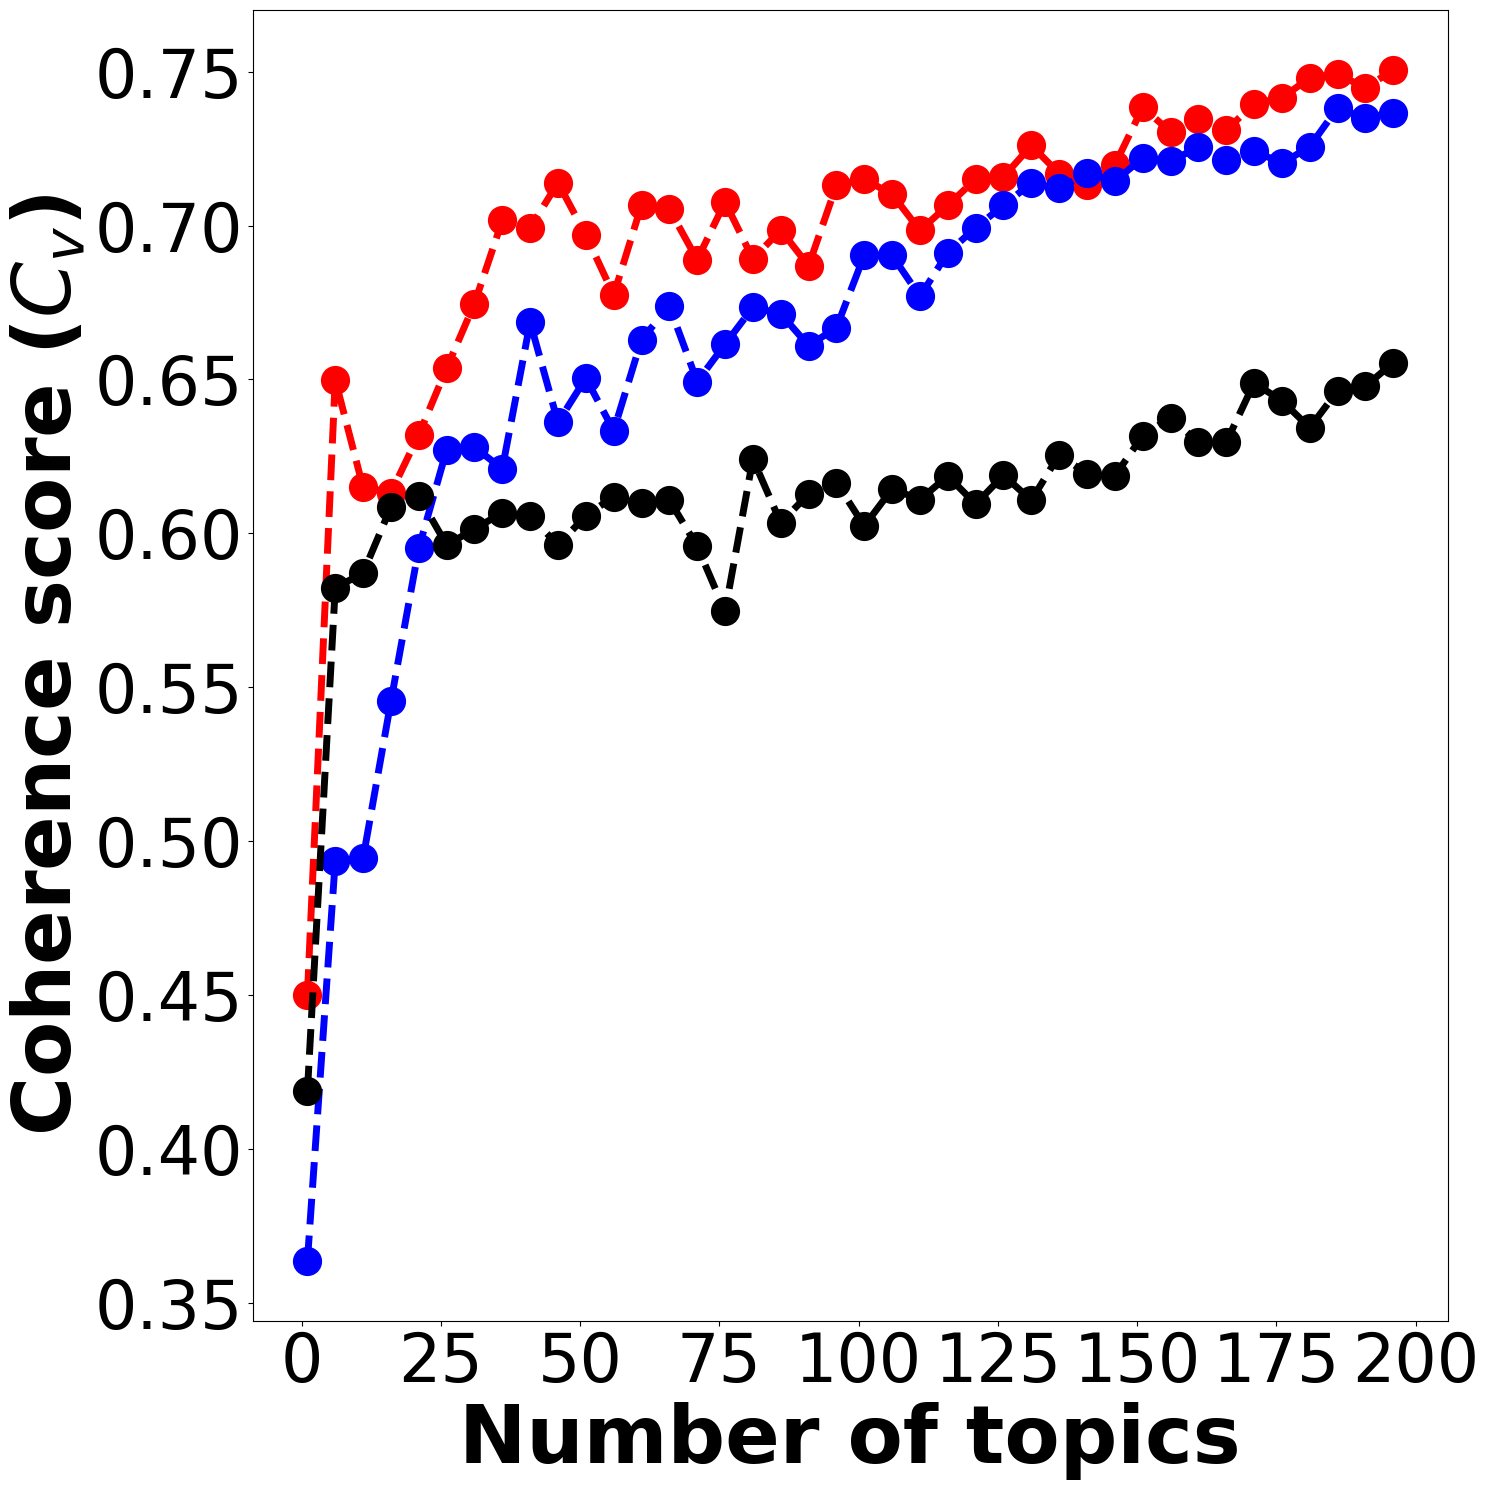

In [ ]:
plt.figure(figsize = [15, 15])
plt.plot(model_results_hyper['Topics'], model_results_hyper['c_v'], '--o', c = 'red', linewidth = 5, label = 'Hyperexponential \npre-trained LDA', markersize = 20)
plt.plot(model_results_zipf['Topics'], model_results_zipf['c_v'], '--o', c = 'blue', linewidth = 5, label = 'Zipf pre-trained LDA', markersize = 20)
plt.plot(model_results_ori['Topics'], model_results_ori['c_v'], '--o', c = 'black', linewidth = 5, label = 'Original LDA', markersize = 20)

plt.xlabel("Number of topics", fontsize = 58, fontweight = 'bold')
plt.ylabel(r"Coherence score ($\boldsymbol{C_v}$)", fontsize = 58, fontweight = 'bold')
plt.xticks(size = 48)
plt.yticks(size = 48)
plt.tight_layout()
# plt.savefig(sys.path[-1] + "images_result/reuters_cv_final.pdf")

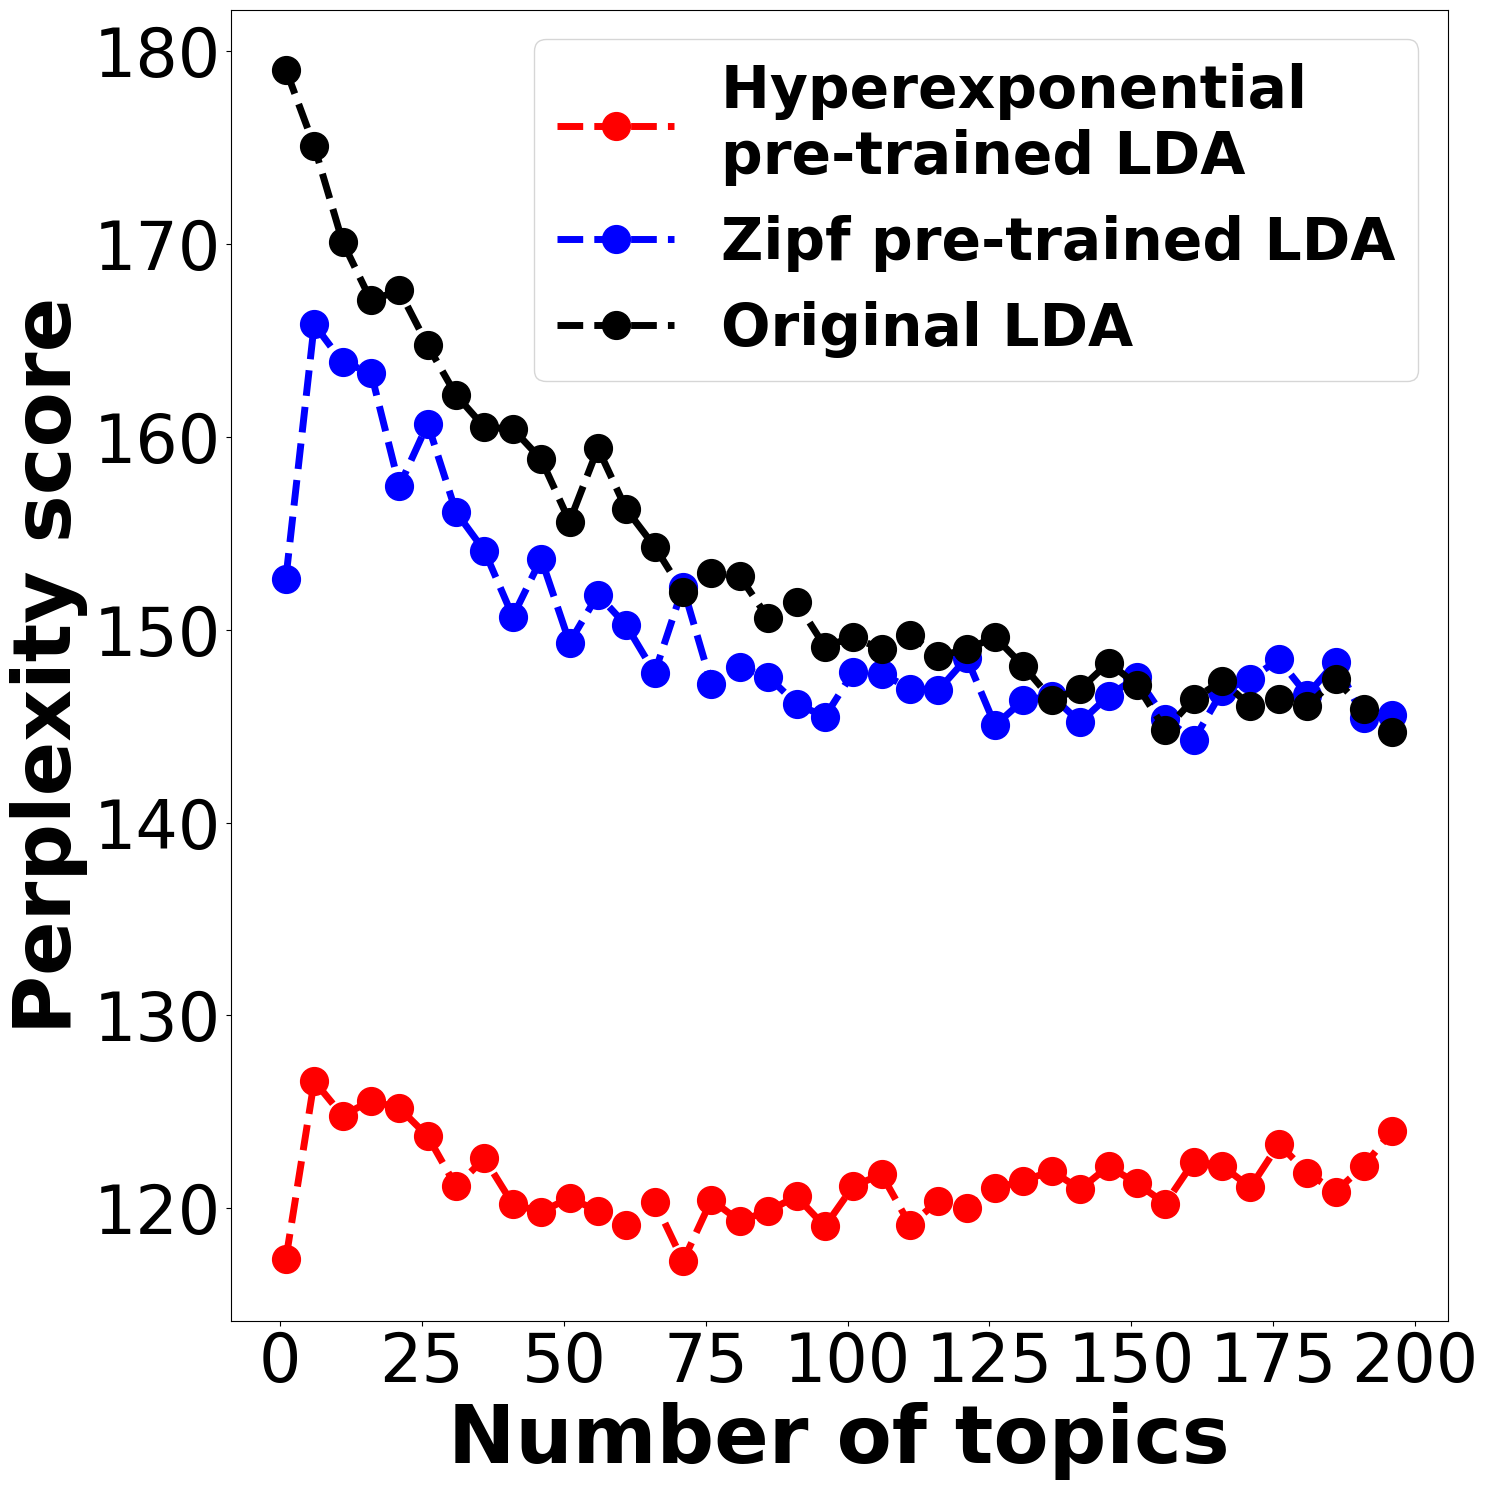

In [ ]:
plt.figure(figsize = [15, 15])
plt.plot(model_results_hyper['Topics'], model_results_hyper['Perplexity'], '--o', c = 'red', linewidth = 5, label = 'Hyperexponential \npre-trained LDA', markersize = 20)
plt.plot(model_results_zipf['Topics'], model_results_zipf['Perplexity'], '--o', c = 'blue', linewidth = 5, label = 'Zipf pre-trained LDA', markersize = 20)
plt.plot(model_results_ori['Topics'], model_results_ori['Perplexity'], '--o', c = 'black', linewidth = 5, label = 'Original LDA', markersize = 20)

plt.xlabel("Number of topics", fontsize = 58, fontweight = 'bold')
plt.ylabel("Perplexity score", fontsize = 58, fontweight = 'bold')
plt.legend(prop={'size': 42,
                 'weight': 'bold'})
plt.xticks(size = 48)
plt.yticks(size = 48)
plt.tight_layout()
# plt.savefig(sys.path[-1] + "images_result/reuters_perplex_final.pdf")

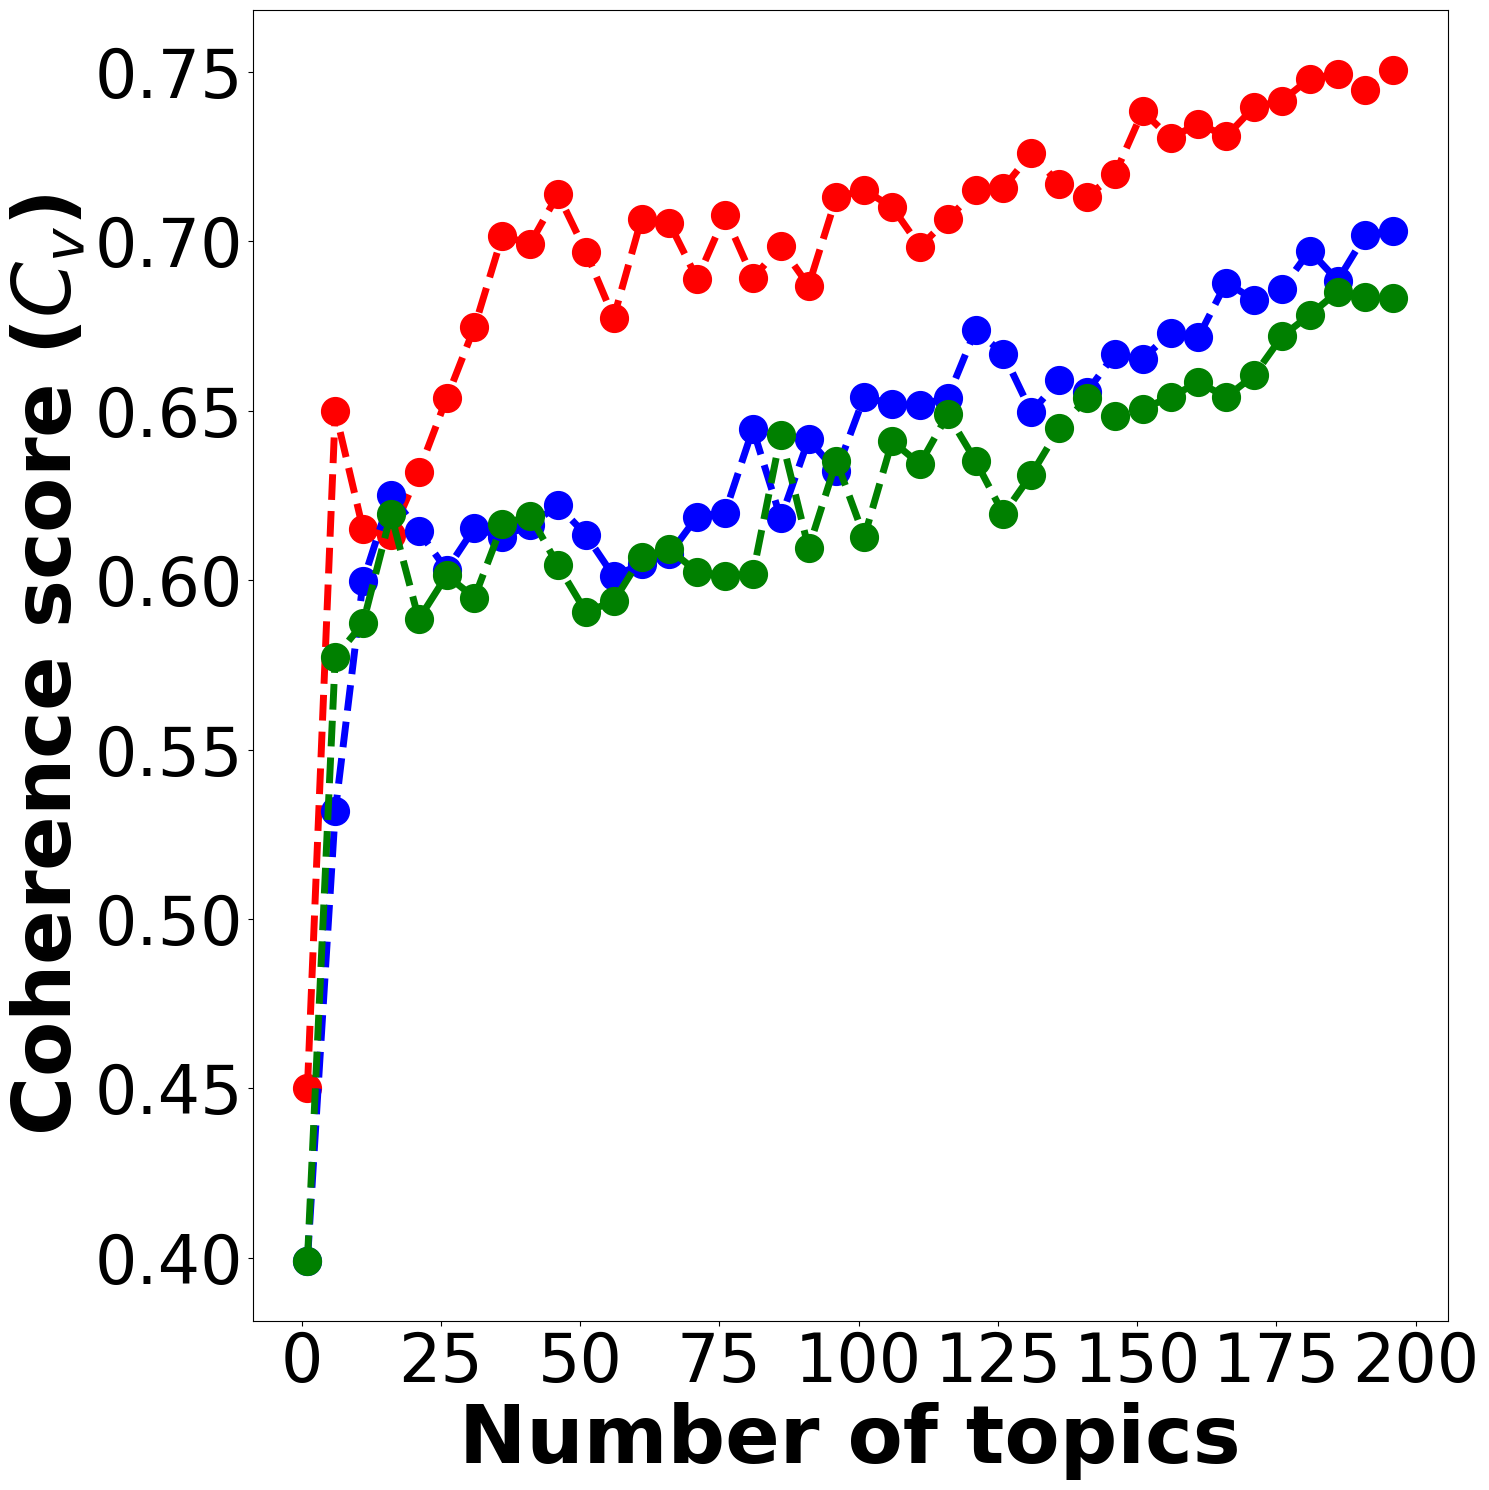

In [ ]:
plt.figure(figsize = [15, 15])
plt.plot(model_results_hyper['Topics'], model_results_hyper['c_v'], '--o', c = 'red', linewidth = 5, markersize = 20)
plt.plot(model_results_hyper_9522['Topics'], model_results_hyper_9522['c_v'], '--o', c = 'blue', linewidth = 5, markersize = 20)
plt.plot(model_results_hyper_17730['Topics'], model_results_hyper_17730['c_v'], '--o', c = 'green', linewidth = 5, markersize = 20)

plt.xlabel("Number of topics", fontsize = 58, fontweight = 'bold')
plt.ylabel(r"Coherence score ($\boldsymbol{C_v}$)", fontsize = 58, fontweight = 'bold')
plt.xticks(size = 48)
plt.yticks(size = 48)
plt.tight_layout()
# plt.savefig(sys.path[-1] + "images_result/cv_compare.pdf")

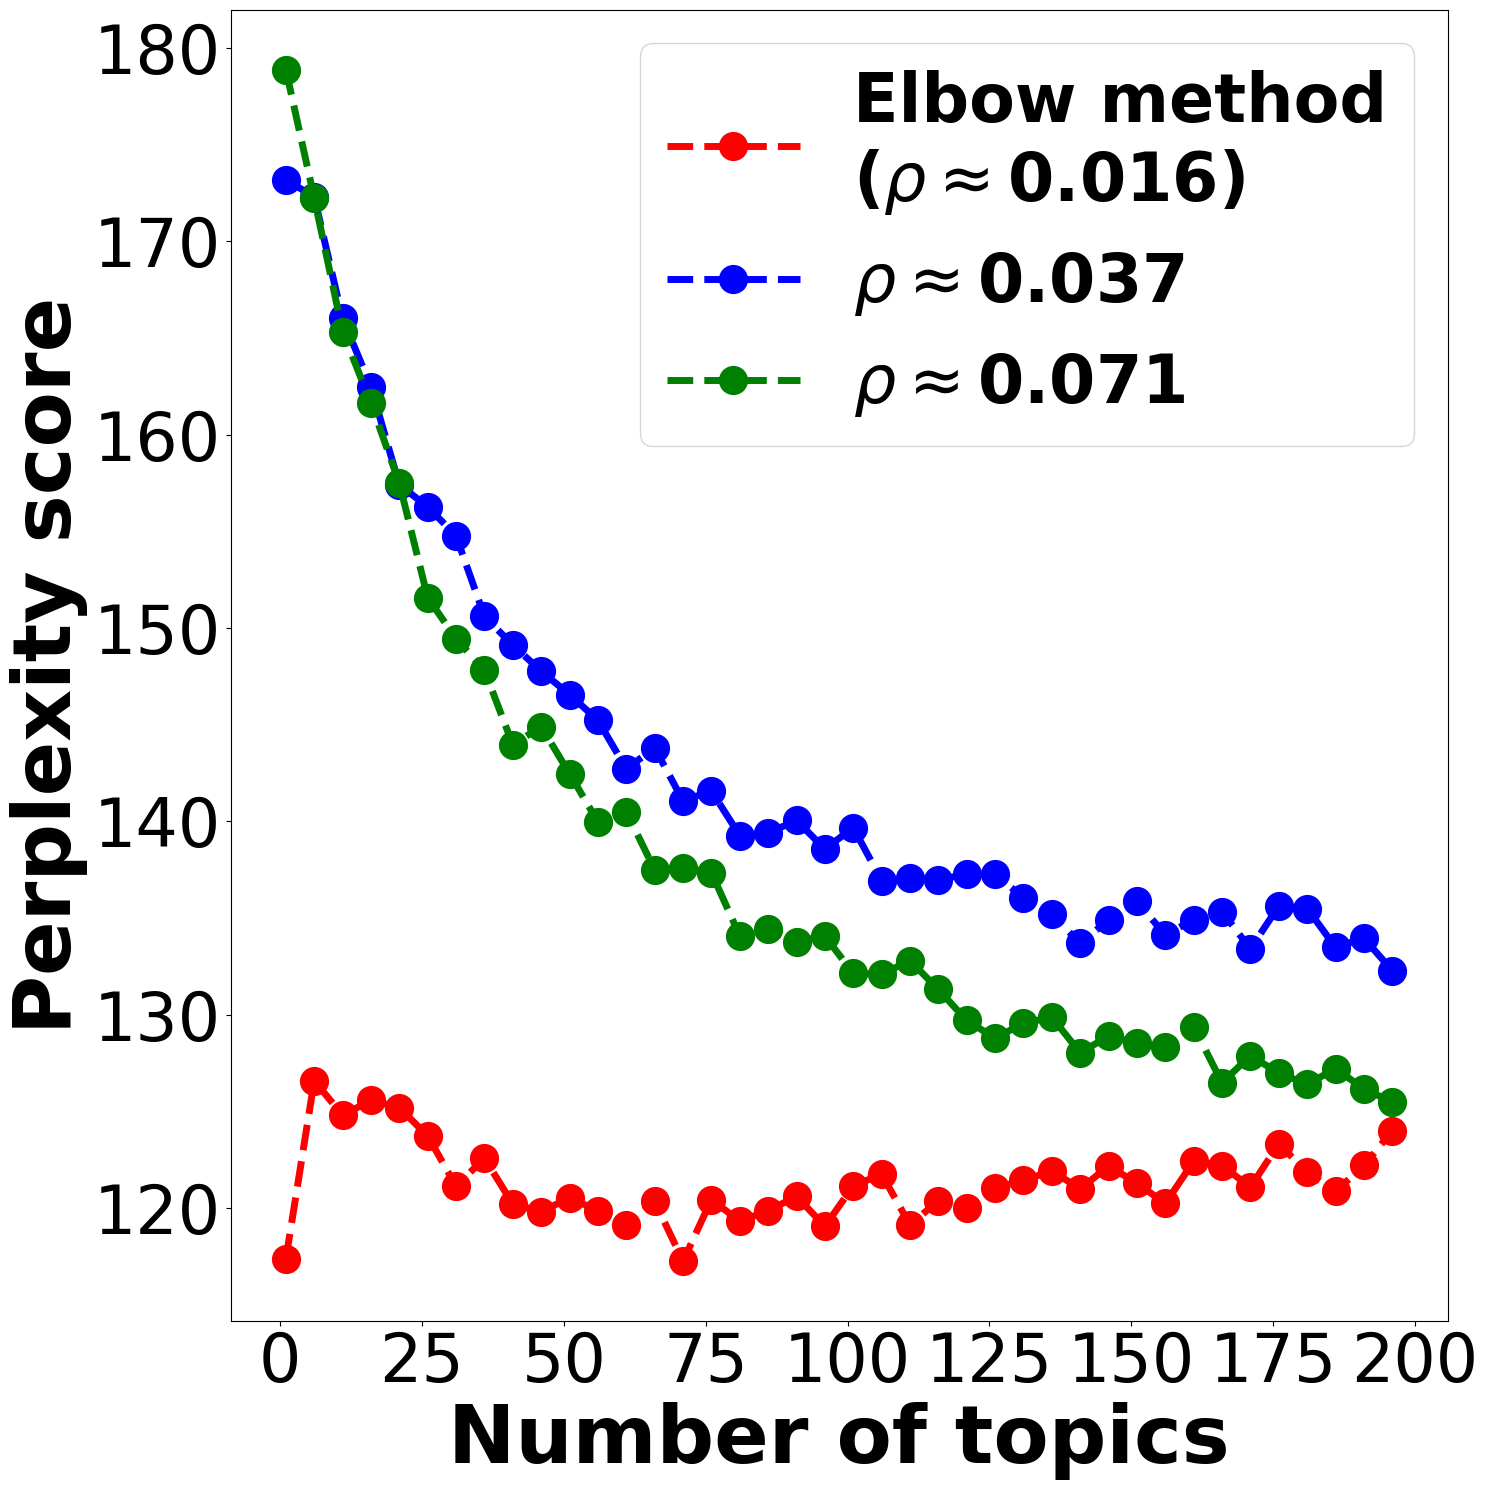

In [ ]:
plt.figure(figsize = [15, 15])
plt.plot(model_results_hyper['Topics'], model_results_hyper['Perplexity'], '--o', c = 'red', linewidth = 5, label="Elbow method\n"r"($\rho\approx$0.016)", markersize = 20)
plt.plot(model_results_hyper_9522['Topics'], model_results_hyper_9522['Perplexity'], '--o', c = 'blue', linewidth = 5, label=r"$\rho\approx$0.037", markersize = 20)
plt.plot(model_results_hyper_17730['Topics'], model_results_hyper_17730['Perplexity'], '--o', c = 'green', linewidth = 5, label=r"$\rho\approx$0.071", markersize = 20)
# plt.plot(model_results_hyper['Topics'][::6], model_results_hyper['c_v'][::6], '--o', c = 'red', linewidth = 5, markersize = 20)
# plt.plot(model_results_zipf['Topics'][::6], model_results_zipf['c_v'][::6], '--o', c = 'blue', linewidth = 5, markersize = 20)
# plt.plot(model_results_ori['Topics'][::6], model_results_ori['c_v'][::6], '--o', c = 'black', linewidth = 5, markersize = 20)

plt.xlabel("Number of topics", fontsize = 58, fontweight = 'bold')
plt.ylabel(r"Perplexity score", fontsize = 58, fontweight = 'bold')
plt.legend(prop={'size': 48,
                 'weight': 'bold'})
plt.xticks(size = 48)
plt.yticks(size = 48)
plt.tight_layout()
# plt.savefig(sys.path[-1] + "images_result/perplex_compare.pdf")

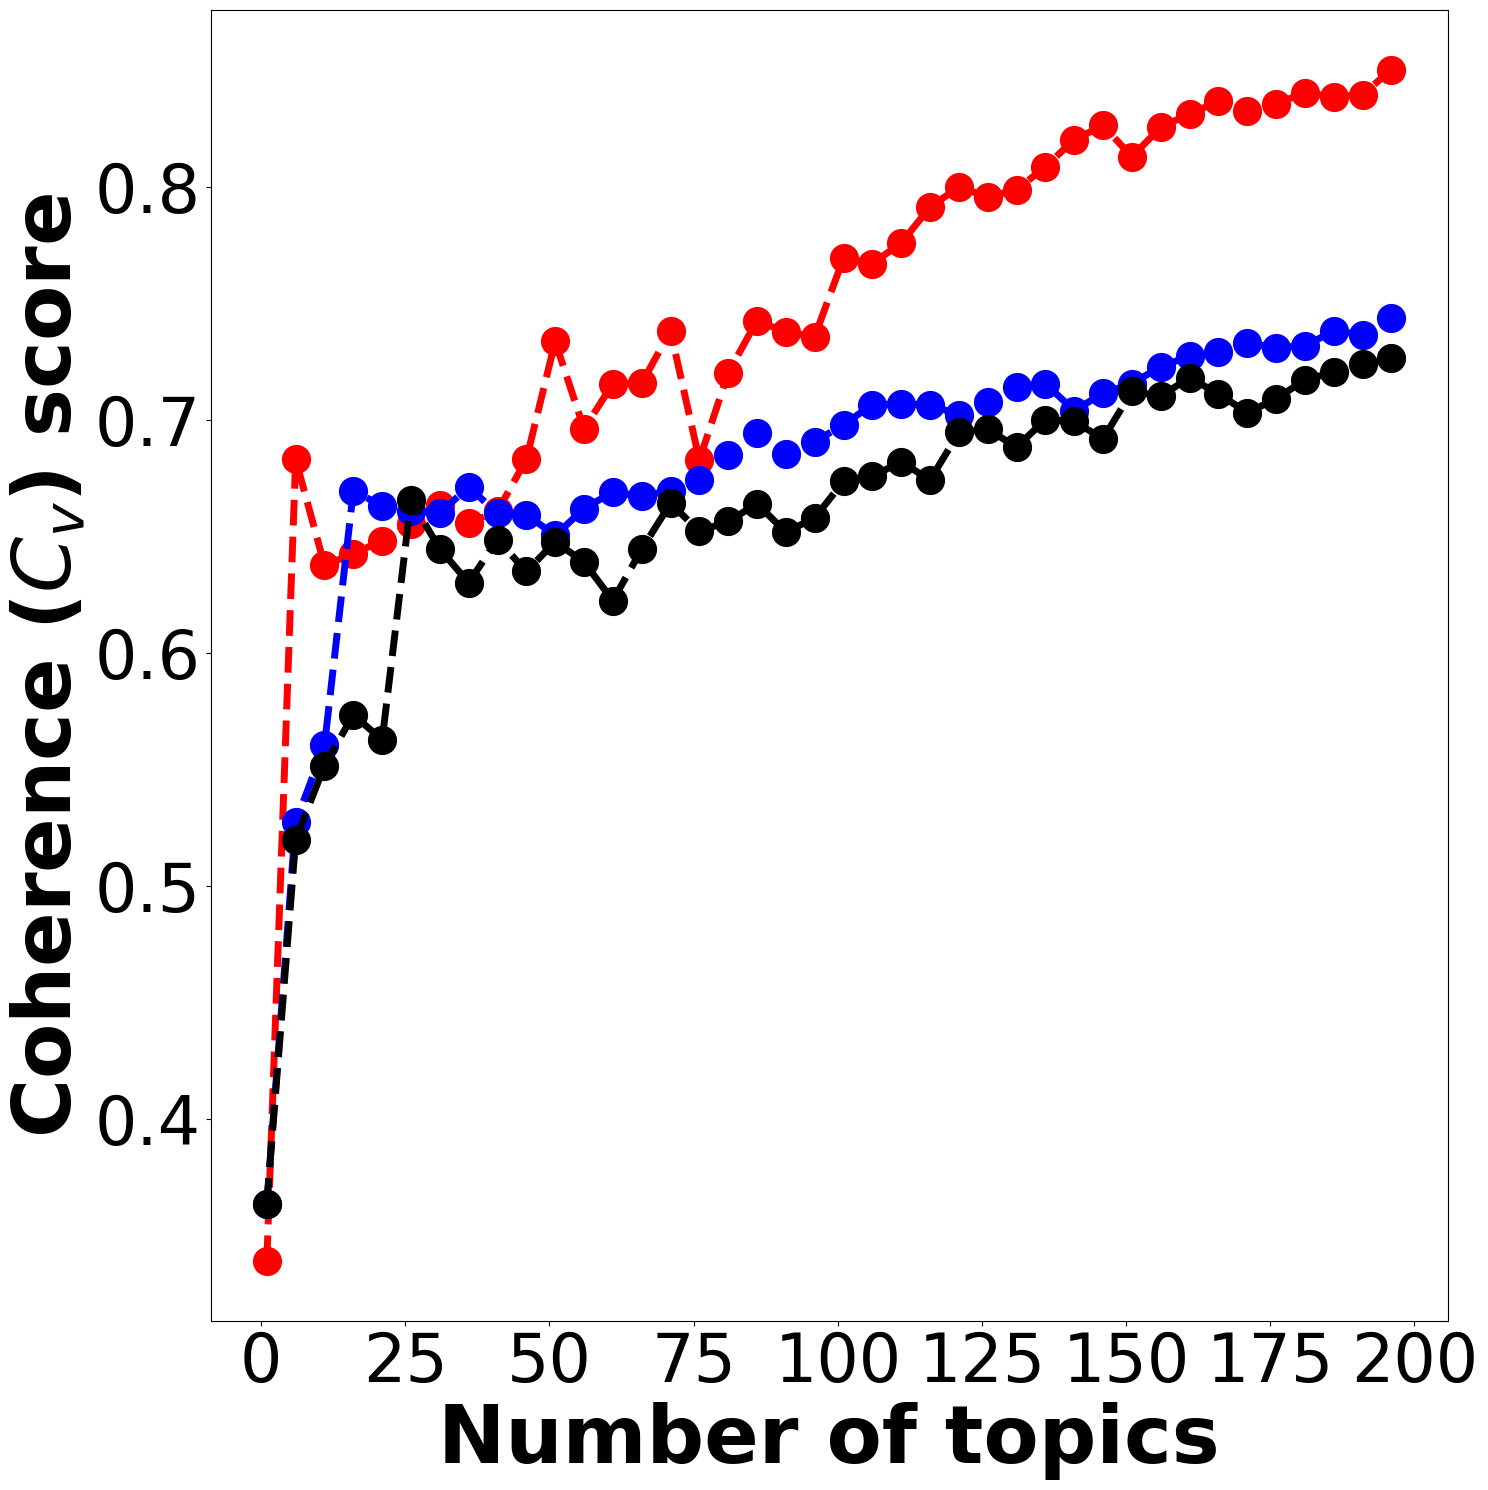

In [ ]:
plt.figure(figsize = [15, 15])
plt.plot(wiki_model_results_hyper['Topics'], wiki_model_results_hyper['c_v'], '--o', c = 'red', linewidth = 5, label = 'Hyperexponential \npre-trained LDA', markersize = 20)
plt.plot(wiki_model_results_zipf['Topics'], wiki_model_results_zipf['c_v'], '--o', c = 'blue', linewidth = 5, label = 'Zipf pre-trained LDA', markersize = 20)
plt.plot(wiki_model_results_ori['Topics'], wiki_model_results_ori['c_v'], '--o', c = 'black', linewidth = 5, label = 'Original LDA', markersize = 20)

plt.xlabel("Number of topics", fontsize = 58, fontweight = 'bold')
plt.ylabel(r"Coherence ($\boldsymbol{C_v}$) score", fontsize = 58, fontweight = 'bold')
plt.xticks(size = 48)
plt.yticks(size = 48)
plt.tight_layout()
# plt.savefig(sys.path[-1] + "images_result/history_cv_final.pdf")

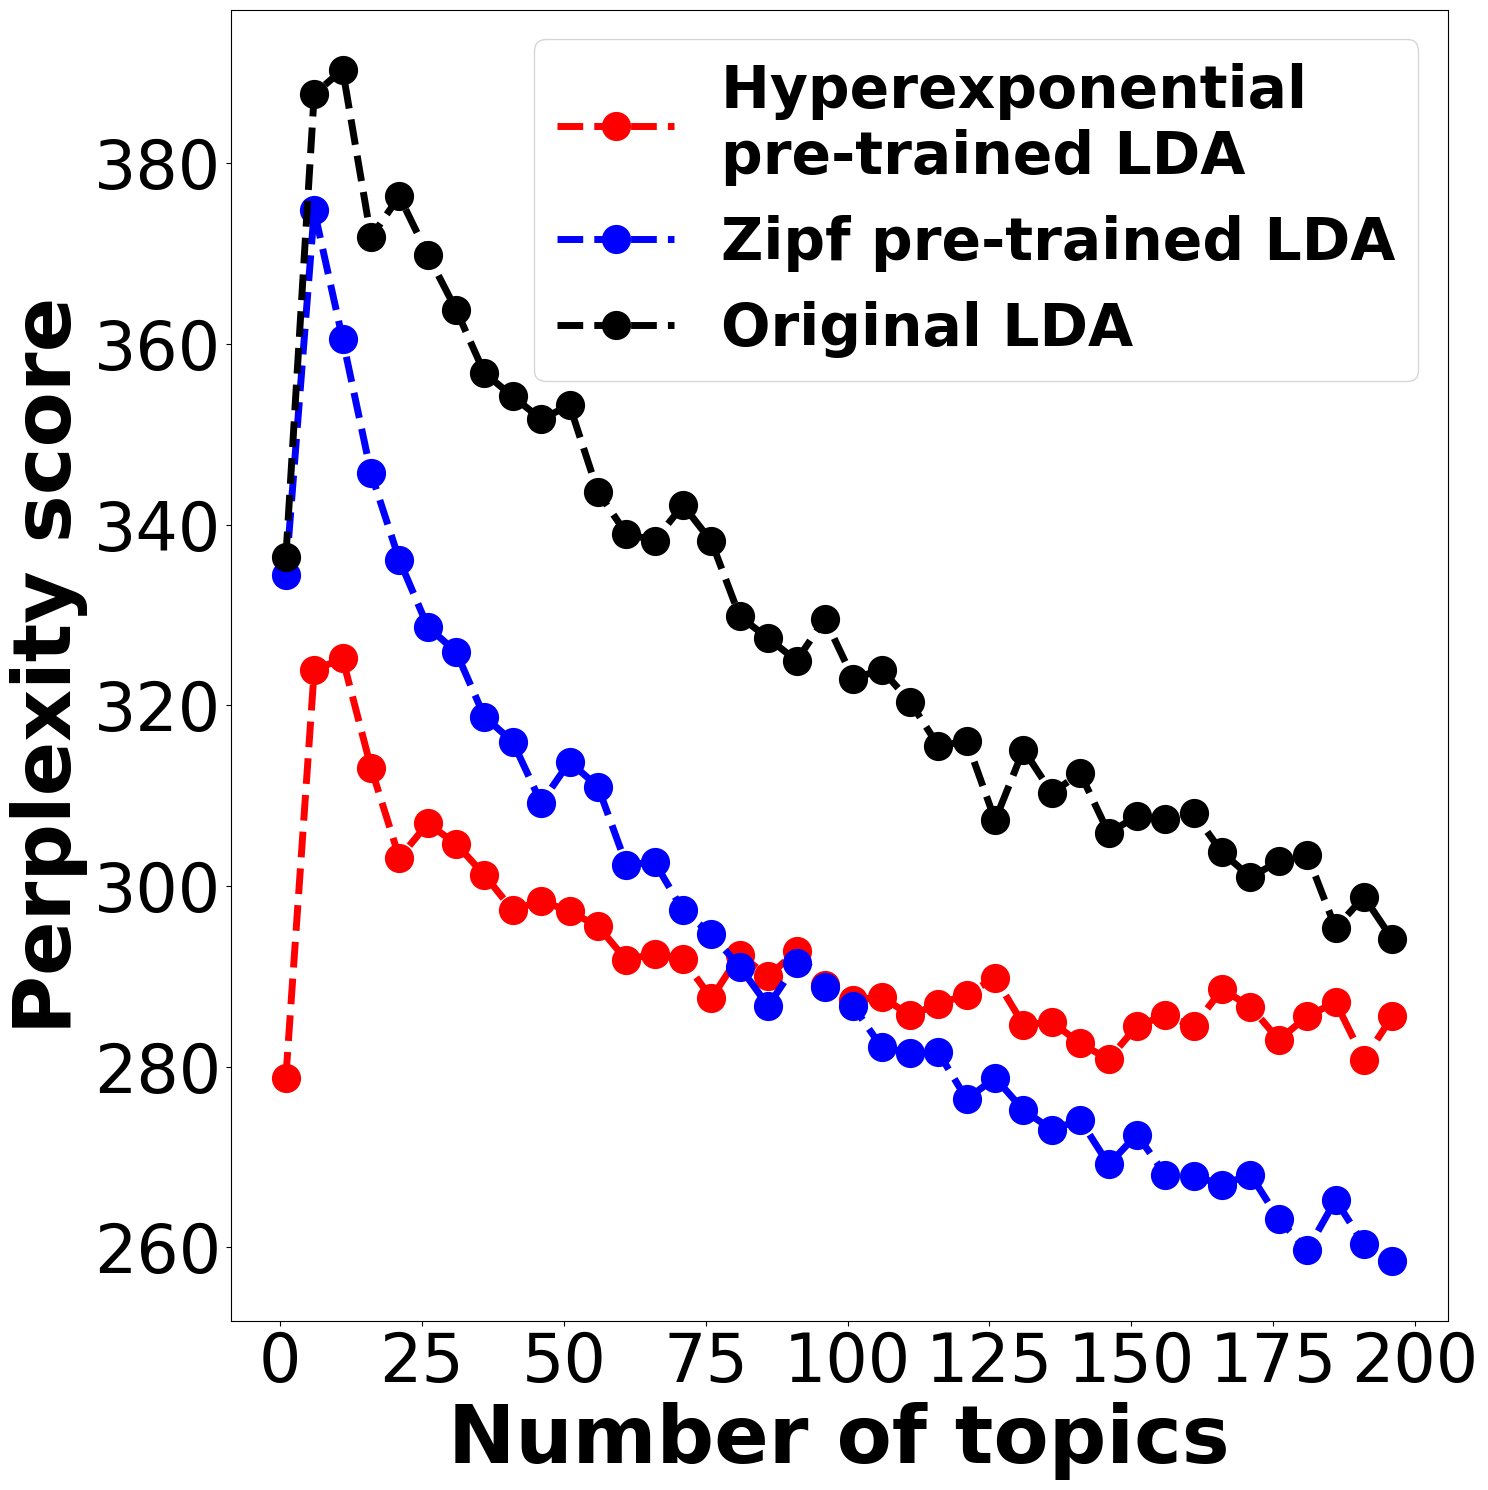

In [ ]:
plt.figure(figsize = [15, 15])
plt.plot(wiki_model_results_hyper['Topics'], wiki_model_results_hyper['Perplexity'], '--o', c = 'red', linewidth = 5, label = 'Hyperexponential \npre-trained LDA', markersize = 20)
plt.plot(wiki_model_results_zipf['Topics'], wiki_model_results_zipf['Perplexity'], '--o', c = 'blue', linewidth = 5, label = 'Zipf pre-trained LDA', markersize = 20)
plt.plot(wiki_model_results_ori['Topics'], wiki_model_results_ori['Perplexity'], '--o', c = 'black', linewidth = 5, label = 'Original LDA', markersize = 20)

plt.xlabel("Number of topics", fontsize = 58, fontweight = 'bold')
plt.ylabel("Perplexity score", fontsize = 58, fontweight = 'bold')
plt.legend(prop={'size': 42,
                 'weight': 'bold'})
plt.xticks(size = 48)
plt.yticks(size = 48)
plt.tight_layout()
# plt.savefig(sys.path[-1] + "images_result/history_perplex_final.pdf")